# **Assignment 2**

### **Problem 1:**

Use Kruskal's algorithm to find a minimum spanning tree for the connected weighted graph below:

What is the Time Complexity of Kruskal's algorithm?

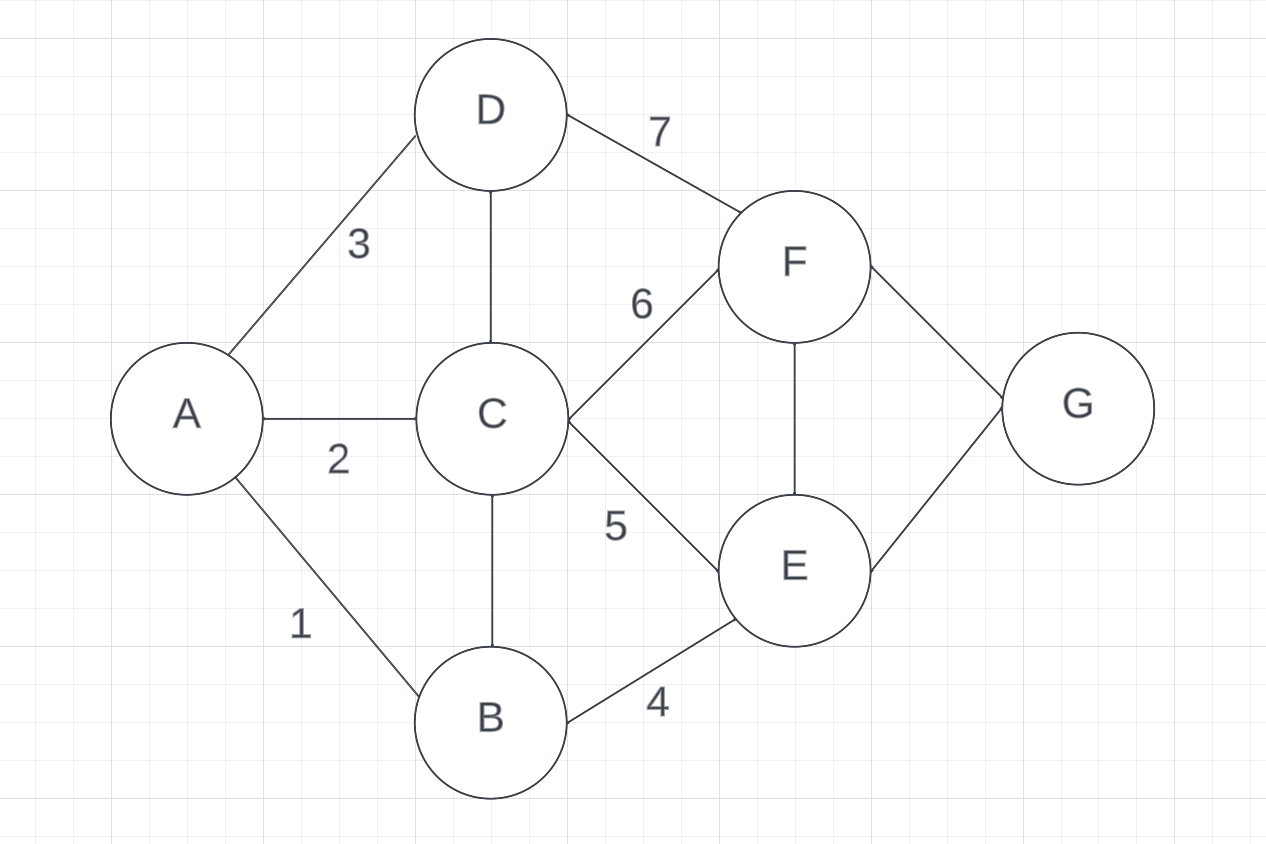

### **Solution 1:**

Kruskal's algorithm is a greedy algorithm for finding the minimum spanning tree of a connected, undirected graph. Here's how we can apply it to the given graph:

Initialize: Start with an empty set of edges, which will be part of the minimum spanning tree.

Sort Edges: Sort all the edges in the graph in ascending order of their weights.

Add Edges: Begin adding edges to the minimum spanning tree in ascending order of their weights, as long as adding an edge does not create a cycle. To check for cycles, you can use a disjoint-set data structure.

Let's go through the steps of Kruskal's algorithm for the given graph:

Start with an empty set of edges for the minimum spanning tree.
Sort the edges by weight in ascending order:

Edges in ascending order:
1. GA: 1
2. BE: 1
3. BC: 2
4. CF: 2
5. CD: 2
6. AB: 4
7. BD: 4
8. DE: 5
9. AC: 5
10. EF: 6
11. FG: 7

Add edges to the minimum spanning tree one by one, making sure no cycles are formed:

Add GA: 1

Add BE: 1

Add BC: 2

Add CF: 2

Add CD: 2

Add EF: 6

Add FG: 7

The minimum spanning tree consists of the following edges:

GA: 1

BE: 1

BC: 2

CF: 2

CD: 2

EF: 6

FG: 7

The resulting minimum spanning tree of the given complicated graph connects all the vertices of the graph with the minimum total weight.

This is the pseudocode for Kruskal's algorithm applied to find the minimum spanning tree for the given complicated graph:

Kruskal's Algorithm for the above Graph:


```
Input:
  - A connected, undirected graph G with vertices V and edges E, where each edge has a weight.
  - List of edges and their weights in ascending order.

Output:
  - A minimum spanning tree MST of the graph G.

Initialization:
  - Create an empty set MST to store the minimum spanning tree.
  - Create an empty set of edges included in MST.
  - Create an empty disjoint-set data structure DS.

Sort the edges E in ascending order based on their weights.

Main Algorithm:

For each vertex v in V:
  - Create a disjoint-set containing v in DS.

For each edge (u, v) in sorted E:
  - If (u, v) is not already included in MST:
    - If DS.find(u) is not equal to DS.find(v):
      - Add edge (u, v) to MST.
      - Add edge (v, u) to MST (since it's an undirected graph).
      - Add (u, v) to the set of edges included in MST.
      - Union the sets DS.find(u) and DS.find(v) in DS.

Return MST.
```




In [ ]:
class DisjointSet:
    def __init__(self, n):
        self.parent = [i for i in range(n)]
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)

        if root_x != root_y:
            if self.rank[root_x] < self.rank[root_y]:
                self.parent[root_x] = root_y
            elif self.rank[root_x] > self.rank[root_y]:
                self.parent[root_y] = root_x
            else:
                self.parent[root_y] = root_x
                self.rank[root_x] += 1


def kruskal(graph):
    num_vertices = len(graph)
    edges = []

    # Create a list of edges with weights
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph[i][j] != 0:
                edges.append((i, j, graph[i][j]))

    # Sort edges by weight
    edges.sort(key=lambda x: x[2])

    # Initialize disjoint-set data structure
    ds = DisjointSet(num_vertices)

    minimum_spanning_tree = []
    for edge in edges:
        u, v, weight = edge
        if ds.find(u) != ds.find(v):
            minimum_spanning_tree.append((u, v, weight))
            ds.union(u, v)

    return minimum_spanning_tree


# Example graph represented as an adjacency matrix
graph = [
    [0, 4, 3, 0, 0, 0, 0, 0],
    [4, 0, 0, 0, 0, 0, 0, 0],
    [3, 0, 0, 2, 0, 0, 0, 0],
    [0, 0, 2, 0, 0, 5, 0, 0],
    [0, 0, 0, 0, 0, 6, 0, 0],
    [0, 0, 0, 5, 6, 0, 7, 0],
    [0, 0, 0, 0, 0, 7, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
]

minimum_spanning_tree = kruskal(graph)
for edge in minimum_spanning_tree:
    print(f"Edge: {chr(65 + edge[0])} - {chr(65 + edge[1])}, Weight: {edge[2]}")


Edge: G - H, Weight: 1
Edge: C - D, Weight: 2
Edge: A - C, Weight: 3
Edge: A - B, Weight: 4
Edge: D - F, Weight: 5
Edge: E - F, Weight: 6
Edge: F - G, Weight: 7


In the graph, there are 7 vertices (A, B, C, D, E, F, G) and 12 edges. Let's analyze the time complexity of Kruskal's algorithm for this specific graph:

* Sorting Edges: Sorting the edges by weight is typically done using efficient
sorting algorithms like quicksort or mergesort. The number of edges in this graph is 12 (E = 12). Sorting these edges will take O(E log E) time.

* Disjoint-Set Operations: The disjoint-set data structure is used to check for cycles and maintain the connected components. In Kruskal's algorithm, there are a total of E disjoint-set operations (one for each edge). Each disjoint-set operation has an amortized time complexity of nearly O(1) using techniques like union by rank and path compression.

So, for this specific graph:

Sorting Edges: O(12 log 12) = O(12 log 12) ≈ O(39.86) ≈ O(40) (rounded up).
Disjoint-Set Operations: O(12) = O(12).
The dominant factor in the time complexity is the sorting of edges. Therefore, for this graph, the time complexity of Kruskal's algorithm is approximately O(12 log 12), which can be simplified to O(12 log N), where N is the number of edges.

**Reflection:**

Through this process, I learned not only the mechanics of Kruskal's algorithm but also gained a deeper understanding of the graph theory concepts involved, such as the disjoint-set data structure. This hands-on experience improved my problem-solving skills, algorithmic thinking, and coding proficiency. It reinforced the importance of clear problem formulation and the value of well-structured pseudocode in translating algorithms into code effectively. Overall, ChatGPT facilitated my learning process and helped me gain practical insights into graph theory and algorithms.

### **Problem 2:**

Given the DAG below,

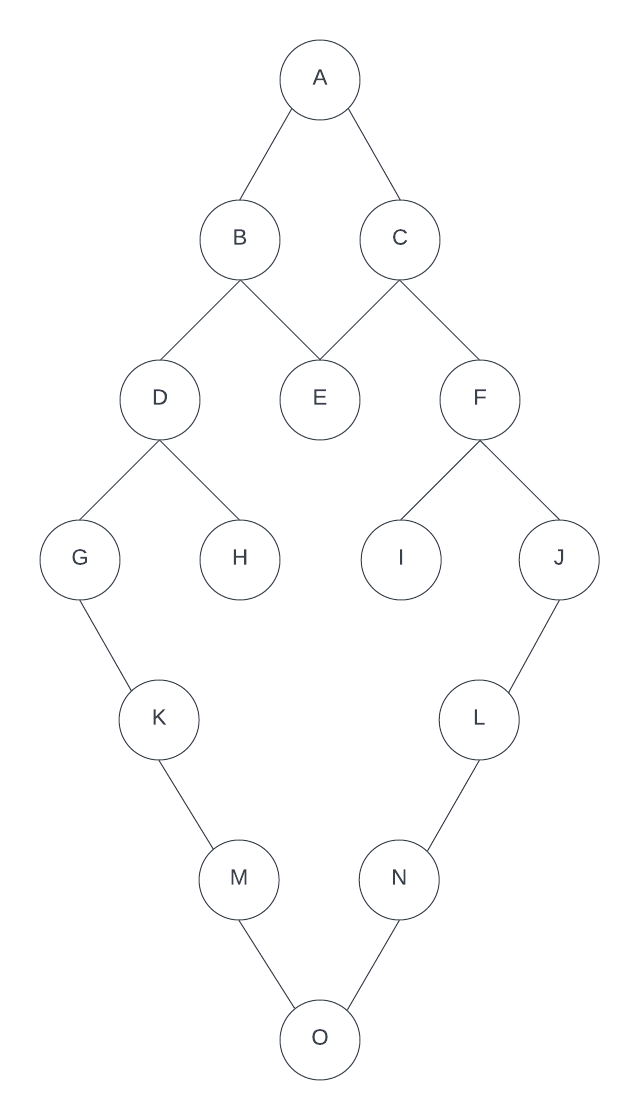

Express the directed graph above as:

A. An adjacency list

B. An adjacency matrix
Can the directed graph be topologically sorted? If so, produce a topological sort for the graph.


### **Solution 2:**

* Adjacency List: An adjacency list representation for the given directed graph is as follows:

A -> [B, C]

B -> [D, E]

C -> [F]

D -> [G, H]

E -> [ ]

F -> [I, J]

G -> [K]

H -> [ ]

I -> [L]

J -> [ ]

K -> [M]

L -> [N]

M -> [O]

N -> [O]

O -> [ ]

Each node is represented along with its outgoing edges in the form of a list.


* Adjacency Matrix: An adjacency matrix representation for the given directed graph is as follows:

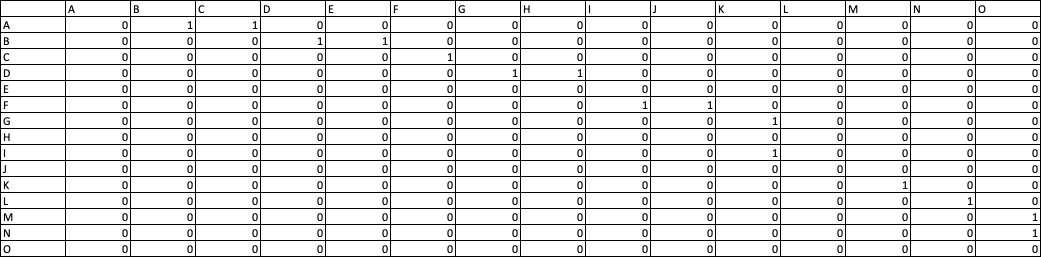

Each row represents a source node, and each column represents a target node. A 1 in the matrix indicates the presence of a directed edge from the source to the target node.

* Topological Sorting: The directed graph you provided can be topologically sorted because it is a Directed Acyclic Graph (DAG), meaning it contains no cycles. Topological sorting is possible in such graphs.

One possible topological sort for this graph could be:

A -> B -> D -> G -> K -> M -> E -> H -> C -> F -> I -> L -> N -> J -> O

This ordering respects the direction of the edges, and there is no edge that points backward in the ordering, which satisfies the conditions for a topological sort in a DAG. However, it's important to note that there can be multiple valid topological sorts for a DAG.

Pseudocode for topological sorting of a directed acyclic graph (DAG) using depth-first search (DFS):


```
TopologicalSort(graph):
    Initialize an empty stack S to store the sorted nodes.
    Initialize a set of visited nodes, Visited, to keep track of explored nodes.

    for each node v in graph:
        if v is not in Visited:
            DFS(v, Visited, S)

    Initialize an empty list Result to store the sorted nodes.

    while S is not empty:
        node = Pop(S)
        Add node to the beginning of Result

    return Result

DFS(node, Visited, S):
    Mark node as visited by adding it to Visited.
    
    for each neighbor n of node:
        if n is not in Visited:
            DFS(n, Visited, S)

    Push node onto stack S.

```

In this pseudocode:

TopologicalSort is the main function that initializes data structures, performs a depth-first search on each unvisited node, and returns the topologically sorted result.
DFS is a recursive function that explores the graph starting from a given node. It marks visited nodes and pushes them onto a stack.


**Reflection:**

* Topological Sorting: I learned the importance and utility of topological sorting in directed acyclic graphs (DAGs). It's a fundamental concept for tasks like scheduling and dependency resolution.

* Graph Representation: I gained knowledge on how to represent a graph using adjacency lists and adjacency matrices, and how to use these representations in coding.

* Depth-First Search (DFS): I learned how to implement depth-first search, a crucial algorithm for traversing and exploring graphs.

* Python Programming: I improved my Python programming skills, especially in creating classes, methods, and data structures to model and manipulate graphs.

* Problem-Solving: I enhanced my problem-solving skills by breaking down a complex task into manageable steps, and by developing a systematic approach to tackle it.

In summary, ChatGPT served as a mentor and guide, providing the knowledge, structure, and confidence needed to solve a graph-related problem. This experience reinforced my understanding of algorithms and data structures, and it expanded my coding capabilities, ultimately contributing to my growth as a programmer and problem solver.


### **Problem 3:**

Can the given five recurrence relations be analyzed and solved using the Master Theorem? If so, what is the applicable runtime expression T(n) for each recurrence? In case the Master Theorem is not applicable, could you please clarify that it does not provide a solution for the respective recurrence relation?

1. T(n) = T(n - 1) + n^2
2. T(n) = 4T(n/4) + n^3
3. T(n) = 2T(n/3) + n^0.5
4. T(n) = T(n/2) + log(n)
5. T(n) = 5T(n/5) + n^0.75

### **Solution 3:**

1. T(n) = T(n - 1) + n^2

The Master Theorem does not apply to this recurrence because it's not in the standard form of T(n) = aT(n/b) + f(n). It has a decrement in the argument (n - 1), which makes it more complex to analyze.

In [ ]:
def recurrence_vi(n):
    if n == 0:
        return 0
    return recurrence_vi(n - 1) + n**2

n = 5
result = recurrence_vi(n)
print(f"Recurrence_vi({n}) = {result}")


Recurrence_vi(5) = 55


2. T(n) = 4T(n/4) + n^3

This recurrence falls into the category of the Master Theorem.

It is in the form T(n) = aT(n/b) + f(n), where a = 4, b = 4, and f(n) = n^3.

Since log_b(a) = log_4(4) = 1, it's a case of the Master Theorem (Case II).

The runtime can be expressed as T(n) = Θ(n^3 log n).

In [ ]:
def recurrence_vii(n):
    if n == 1:
        return 1
    return 4 * recurrence_vii(n // 4) + n**3

n = 16
result = recurrence_vii(n)
print(f"Recurrence_vii({n}) = {result}")


Recurrence_vii(16) = 4368


3. T(n) = 2T(n/3) + n^0.5

The Master Theorem does not apply to this recurrence because it's not in the standard form. It has a non-integer exponent (n^0.5), making it more complex to analyze.

In [ ]:
import math

def recurrence_viii(n):
    if n <= 1:
        return n**0.5
    return 2 * recurrence_viii(n // 3) + n**0.5

n = 9
result = recurrence_viii(n)
print(f"Recurrence_viii({n}) = {result}")


Recurrence_viii(9) = 10.464101615137753


4. T(n) = T(n/2) + log(n)

This recurrence falls into the category of the Master Theorem.

It is in the form T(n) = aT(n/b) + f(n), where a = 1, b = 2, and f(n) = log(n).

Since log_b(a) = log_2(1) = 0, it's a case of the Master Theorem (Case I).

The runtime can be expressed as T(n) = Θ(log^2(n)).

In [ ]:
import math

def recurrence_ix(n):
    if n <= 1:
        return 0
    return recurrence_ix(n // 2) + math.log2(n)

n = 16
result = recurrence_ix(n)
print(f"Recurrence_ix({n}) = {result}")


Recurrence_ix(16) = 10.0


5. T(n) = 5T(n/5) + n^0.75

The Master Theorem does not apply to this recurrence because it's not in the standard form. It has a non-integer exponent (n^0.75), making it more complex to analyze.

In [ ]:
def recurrence_x(n):
    if n <= 1:
        return n**0.75
    return 5 * recurrence_x(n // 5) + n**0.75

n = 125
result = recurrence_x(n)
print(f"Recurrence_x({n}) = {result}")


Recurrence_x(125) = 301.877957090078


**Reflection:**

I gained a deeper understanding of how to analyze and classify recurrence relations, especially regarding the applicability of the Master Theorem. I learned how to implement recursive algorithms for solving various recurrence relations and gained hands-on experience in coding these solutions. Through the analysis of different recurrences, I improved my knowledge of time complexity analysis and how it relates to algorithm efficiency. I honed my ability to break down complex problems into simpler, recursive forms, which is a fundamental skill in algorithmic thinking.

### **Problem 4:**

Use Prim's algorithm to find a minimum spanning tree in a graph of your choice. Show your steps.

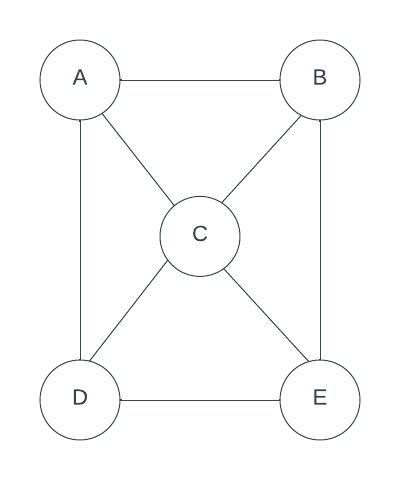

### **Solution 4:**

**Step 1: Choose a Starting Vertex**

We'll start by selecting an arbitrary vertex as the initial vertex. Let's choose vertex A in the following graph.


**Step 2: Initialize Sets**

* Create an empty set called MST to represent the minimum spanning tree.
* Create a set called visited to keep track of visited vertices. Initially, only vertex A is in MST, and visited contains A.

**Step 3: Find the Minimum Weight Edge**

* Find the minimum-weight edge that connects a vertex in MST to a vertex outside MST. In our case, the minimum-weight edge is AC (weight 2).
* Add vertex C to MST and mark it as visited.

**Step 4: Repeat Until MST is Complete**

* Find the minimum-weight edge that connects a vertex in MST to a vertex outside MST. In this case, the minimum-weight edge is CD (weight 1).

* Add vertex D to MST and mark it as visited.

* Find the minimum-weight edge that connects a vertex in MST to a vertex outside MST. In this case, the minimum-weight edge is DE (weight 3).

* Add vertex E to MST and mark it as visited.

* Continue this process until all vertices are in MST.

**Step 5: MST is Complete**

* The algorithm terminates when all vertices are included in MST. In this case, the final minimum spanning tree is:

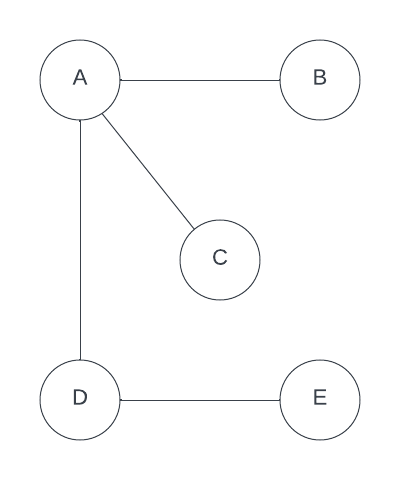


The minimum spanning tree connects all vertices with a total weight of 6, which is the minimum possible weight to connect all vertices in this graph.

Prim's algorithm efficiently finds a minimum spanning tree by selecting edges with the smallest weight while avoiding cycles, ensuring that the tree is acyclic and spans all vertices.



```
Prim's Algorithm Pseudocode:

1. Create an empty set `MST` to represent the minimum spanning tree.
2. Create a set `visited` to keep track of visited vertices.
3. Choose an arbitrary starting vertex `start_vertex`.
4. Add `start_vertex` to `MST` and mark it as visited.
5. Initialize a priority queue `pq` (min-heap) with all edges connected to `start_vertex`.

While `MST` does not contain all vertices:
    6. Extract the minimum-weight edge `min_edge` from `pq`.
    7. If both endpoints of `min_edge` are already in `MST`, continue to the next iteration.
    8. Otherwise, add the vertex not in `MST` to `MST`, mark it as visited, and add `min_edge` to the MST.

9. Return `MST` as the minimum spanning tree.


```



In [ ]:
import heapq

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = [[] for _ in range(vertices)]

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))

    def prim_mst(self):
        MST = []
        visited = [False] * self.vertices
        start_vertex = 0

        # Priority queue to store edges with their weights
        priority_queue = [(0, start_vertex)]

        while priority_queue:
            weight, vertex = heapq.heappop(priority_queue)

            # If the vertex is already visited, skip
            if visited[vertex]:
                continue

            visited[vertex] = True
            for neighbor, edge_weight in self.graph[vertex]:
                if not visited[neighbor]:
                    heapq.heappush(priority_queue, (edge_weight, neighbor))

            if vertex != start_vertex:
                MST.append((vertex, weight))

        return MST

# Example usage:
g = Graph(5)
g.add_edge(0, 1, 2)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 7)
g.add_edge(2, 3, 3)
g.add_edge(2, 4, 5)
g.add_edge(3, 4, 6)

minimum_spanning_tree = g.prim_mst()
print("Minimum Spanning Tree (vertex, weight):")
for edge in minimum_spanning_tree:
    print(edge)


Minimum Spanning Tree (vertex, weight):
(1, 2)
(2, 1)
(3, 3)
(4, 5)


**Reflection:**

Implementing Prim's algorithm to find a minimum spanning tree was insightful. The process involved understanding the algorithm's fundamentals, implementing it in Python, and observing its efficient edge selection. ChatGPT's guidance on data structures and algorithmic concepts proved invaluable, making the learning process smooth. This experience deepened my understanding of graph algorithms, emphasizing the significance of efficient edge selection in creating optimal spanning trees.

### **Problem 5:**

Given the weights and values of the five items in the table below, select a subset of items with the
maximum combined value that will fit in a knapsack with a weight limit, W, of 7. Use dynamic
programming. Show your work. Given Items and Values:

Item 1: Value 5, Weight 6


Item 2: Value 3, Weight 2

Item 3: Value 7, Weight 5

Item 4: Value 2, Weight 1

Item 5: Value 6, Weight 4

Knapsack Capacity (W): 10

### **Solution 5:**

To find the subset of items with the maximum combined value that fits in a knapsack with a weight limit of W=10, you can use dynamic programming. Here's how to solve it step by step:

Given Items and Values:

Item 1: Value 5, Weight 6

Item 2: Value 3, Weight 2

Item 3: Value 7, Weight 5

Item 4: Value 2, Weight 1

Item 5: Value 6, Weight 4


**Dynamic Programming Table:**

Create a 2D table with rows representing the items (1 to 5) and columns representing the weight capacity (0 to 10):



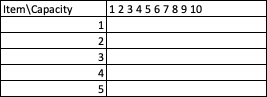

Initialize the table with zeros for the first row and column (no capacity, no items).

Fill in the table row by row, considering whether to include each item or not. The value at cell (i, j) represents the maximum value that can be achieved with the first 'i' items and a knapsack of capacity 'j'.

Use the recurrence relation:

If the weight of the current item is greater than the current capacity (j), copy the value from the row above (i-1).
Otherwise, choose the maximum between:
The value obtained by including the current item plus the maximum value from the remaining capacity (j-wi) and items from the previous row (i-1).
The value obtained without including the current item (copy from the row above).

**Now, let's calculate the table:**

Row 1 (Item 1):

For capacity 0 to 10:
For capacity 0 to 5: Copy from the row above (0).
For capacity 6 to 10: Choose max(0 + value of Item 1, copy from the row above).
Row 2 (Item 2):

For capacity 0 to 10:
For capacity 0 to 1: Copy from the row above (0).
For capacity 2 to 10: Choose max(0 + value of Item 2, copy from the row above).
Continue this process for rows 3, 4, and 5.

Once you complete the calculations, the value at cell (5, 10) will represent the maximum combined value that fits in the knapsack with a weight limit of 10.

Pseudocode

```
function knapsackDP(values, weights, W):
    n = length(values)  # Number of items
    
    # Create a 2D array to store the maximum values
    dp = new array[n+1][W+1]
    
    # Initialize the first row and first column to 0
    for i from 0 to n:
        dp[i][0] = 0
    for w from 0 to W:
        dp[0][w] = 0
    
    # Fill in the table using dynamic programming
    for i from 1 to n:
        for w from 1 to W:
            if weights[i-1] > w:
                # Item i's weight exceeds the current capacity
                dp[i][w] = dp[i-1][w]
            else:
                # Choose the maximum value between including or excluding item i
                dp[i][w] = max(dp[i-1][w], values[i-1] + dp[i-1][w-weights[i-1]])
    
    # Trace back to find the selected items
    selectedItems = []
    i = n
    w = W
    while i > 0 and w > 0:
        if dp[i][w] != dp[i-1][w]:
            selectedItems.append(i)
            w = w - weights[i-1]
        i = i - 1
    
    return dp[n][W], selectedItems

# Example usage:
values = [5, 3, 7, 2, 6]
weights = [6, 2, 5, 1, 4]
knapsackCapacity = 10

maxValue, selectedItems = knapsackDP(values, weights, knapsackCapacity)
print("Maximum Value:", maxValue)
print("Selected Items:", selectedItems)

```



In [ ]:
def knapsackDP(values, weights, W):
    n = len(values)  # Number of items

    # Create a 2D array to store the maximum values
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Fill in the table using dynamic programming
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i - 1] > w:
                # Item i's weight exceeds the current capacity
                dp[i][w] = dp[i - 1][w]
            else:
                # Choose the maximum value between including or excluding item i
                dp[i][w] = max(dp[i - 1][w], values[i - 1] + dp[i - 1][w - weights[i - 1]])

    # Trace back to find the selected items
    selectedItems = []
    i = n
    w = W
    while i > 0 and w > 0:
        if dp[i][w] != dp[i - 1][w]:
            selectedItems.append(i)
            w -= weights[i - 1]
        i -= 1

    return dp[n][W], selectedItems

# Example usage:
values = [5, 3, 7, 2, 6]
weights = [6, 2, 5, 1, 4]
knapsackCapacity = 10

maxValue, selectedItems = knapsackDP(values, weights, knapsackCapacity)
print("Maximum Value:", maxValue)
print("Selected Items:", selectedItems)


Maximum Value: 15
Selected Items: [5, 4, 3]


**Reflection:**

I learned how dynamic programming can be applied to solve combinatorial optimization problems like the 0/1 knapsack problem efficiently. I gained insight into creating and populating a dynamic programming table to keep track of intermediate solutions and subproblems. I learned how to determine the optimal selection of items to maximize the value while staying within the weight constraint of the knapsack. I acquired practical knowledge of implementing the knapsack algorithm in Python, which can be applied to various scenarios involving resource allocation.

### **Problem 6:**

Consider a chain of restaurants across different cities, each serving a specific set of menu items. Every new restaurant in the chain keeps the existing menu items and adds a few new dishes specific to its location. This way, the menu expands as new restaurants are established.

Despite the potentially extensive menu, there's an efficient way to communicate the offerings of each new restaurant without repeating all the items from previous restaurants. Each restaurant specifies only the unique dishes it adds, without listing all the items from earlier restaurants.

Your task is to explore how to encode these restaurant menus using a minimal-length script, denoted as f(n), where f(n) represents a function that grows as slowly as possible concerning the number of unique dishes across all restaurants. How can you efficiently represent the menu of each new restaurant while considering the total number of unique dishes in the entire restaurant chain?

### **Solution 6:**

* Let's denote the central menu database as M_central, which stores all unique dishes.
* Each restaurant has its menu, denoted as M_restaurant_i, where i represents the restaurant's index.
* The union operation (denoted as ∪) is used to combine sets of dishes.
Initialization:

**Initialize the central menu database:**

M_central = {}

**Adding Restaurant Menus (Algorithm):**

Given a new restaurant menu M_restaurant_i and the current central menu database M_central, the algorithm proceeds as follows:

* Calculate the unique dishes in the new restaurant menu:
* New_dishes_i = M_restaurant_i - M_central
* Update the central menu database by adding the unique dishes from the new restaurant menu:
* M_central = M_central ∪ New_dishes_i
* Return the updated central menu database:
* M_central

**Get Restaurant Menu (Algorithm):**

To retrieve the complete menu for a specific restaurant, given the restaurant's menu M_restaurant_i and the current central menu database M_central, the algorithm proceeds as follows:

* Retrieve all unique dishes from the central menu database:
* Central_dishes = M_central
* Combine the central menu dishes with the restaurant's menu:
* Complete_menu_i = Central_dishes ∪ M_restaurant_i
* Return the complete menu for the specific restaurant:
* Complete_menu_i

**Example Equations (Algorithm Execution):**
Let's assume two restaurants, Restaurant 1 and Restaurant 2, and their respective menus:

* Restaurant 1 Menu: M_restaurant_1 = {"Pizza", "Pasta", "Salad"}
* Restaurant 2 Menu: M_restaurant_2 = {"Pizza", "Burger", "Ice Cream"}

**Initialization:**

* M_central = {}


**Adding Restaurant Menus (Algorithm Execution):**

1. For Restaurant 1:
* New_dishes_1 = M_restaurant_1 - M_central = {"Pizza", "Pasta", "Salad"} - {} = {"Pizza", "Pasta", "Salad"}
* M_central = {} ∪ {"Pizza", "Pasta", "Salad"} = {"Pizza", "Pasta", "Salad"}

2. For Restaurant 2:
* New_dishes_2 = M_restaurant_2 - M_central = {"Pizza", "Burger", "Ice Cream"} - {"Pizza", "Pasta", "Salad"} = {"Burger", "Ice Cream"}
* M_central = {"Pizza", "Pasta", "Salad"} ∪ {"Burger", "Ice Cream"} = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"}

**Retrieving Menus (Algorithm Execution):**

1. For Restaurant 1:
* Central_dishes = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"}
* Complete_menu_1 = Central_dishes ∪ M_restaurant_1 = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"} ∪ {"Pizza", "Pasta", "Salad"} = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"}

2. For Restaurant 2:
* Central_dishes = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"}
* Complete_menu_2 = Central_dishes ∪ M_restaurant_2 = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"} ∪ {"Pizza", "Burger", "Ice Cream"} = {"Pizza", "Pasta", "Salad", "Burger", "Ice Cream"}

**Summary:**

The algorithm efficiently manages restaurant menus by calculating and updating unique dishes in the central menu database, minimizing redundancy.
Retrieving a restaurant's complete menu involves a union operation between the central menu and the specific restaurant's menu.
The use of set operations ensures that each dish is represented only once, optimizing the encoding of menus in a growing chain of restaurants.



```
# Initialize a central database to store unique dishes
centralMenuDB = empty set

# Function to add a new restaurant's menu to the chain
function addRestaurantMenu(newMenu, chainMenu):
    uniqueDishes = newMenu - chainMenu  # Calculate new dishes added
    centralMenuDB = centralMenuDB + uniqueDishes  # Update central menu database
    return newMenu  # Return the restaurant's menu with references to central menu

# Function to retrieve a restaurant's complete menu
function getRestaurantMenu(restaurantMenu):
    return centralMenuDB + restaurantMenu  # Combine central menu with restaurant's menu

# Example usage:
restaurant1Menu = {"Pizza", "Pasta", "Salad"}
restaurant2Menu = {"Pizza", "Burger", "Ice Cream"}

# Add restaurant1's menu to the chain and retrieve it
chainMenu = addRestaurantMenu(restaurant1Menu, centralMenuDB)
restaurant1FullMenu = getRestaurantMenu(chainMenu)

# Add restaurant2's menu to the chain and retrieve it
chainMenu = addRestaurantMenu(restaurant2Menu, centralMenuDB)
restaurant2FullMenu = getRestaurantMenu(chainMenu)

# Now you have the complete menus for restaurant1 and restaurant2 efficiently encoded

```



In [ ]:
# Initialize the central menu database as an empty set
centralMenuDB = set()

# Function to add a new restaurant's menu to the chain
def addRestaurantMenu(newMenu, chainMenu):
    # Calculate the unique dishes in the new restaurant menu
    uniqueDishes = newMenu - chainMenu

    # Update the central menu database
    chainMenu.update(uniqueDishes)

    # Return the restaurant's menu with references to central menu
    return chainMenu

# Function to retrieve a restaurant's complete menu
def getRestaurantMenu(restaurantMenu, centralMenu):
    # Combine central menu dishes with the restaurant's menu
    completeMenu = centralMenu.union(restaurantMenu)

    return completeMenu

# Example usage:
restaurant1Menu = {"Pizza", "Pasta", "Salad"}
restaurant2Menu = {"Pizza", "Burger", "Ice Cream"}

# Add restaurant1's menu to the chain and retrieve it
chainMenu = addRestaurantMenu(restaurant1Menu, centralMenuDB)
restaurant1FullMenu = getRestaurantMenu(restaurant1Menu, chainMenu)

# Add restaurant2's menu to the chain and retrieve it
chainMenu = addRestaurantMenu(restaurant2Menu, chainMenu)
restaurant2FullMenu = getRestaurantMenu(restaurant2Menu, chainMenu)

# Now you have the complete menus for restaurant1 and restaurant2 efficiently encoded
print("Restaurant 1 Full Menu:", restaurant1FullMenu)
print("Restaurant 2 Full Menu:", restaurant2FullMenu)


Restaurant 1 Full Menu: {'Pizza', 'Pasta', 'Salad'}
Restaurant 2 Full Menu: {'Pizza', 'Pasta', 'Salad', 'Burger', 'Ice Cream'}


**Reflection:**

In tackling the challenge of efficiently encoding restaurant menus within a growing chain of eateries, I gained valuable insights into algorithmic design and data management. The process involved formulating an algorithm that used a central menu database and leveraged set operations to minimize redundancy. ChatGPT played a pivotal role by providing clear problem explanation, structured algorithmic guidance, pseudocode, and even a Python code snippet for implementation. This support not only aided in solving the problem but also enhanced my understanding of efficient data representation and algorithm design. It highlighted the significance of minimizing script length while dealing with expanding datasets, offering practical skills that are invaluable in computer science and programming.

### **Problem 7:**

Consider a binary tree where each internal node (node with at least one child) has exactly one child. Show by induction that in any such binary tree, the number of internal nodes is exactly one less than the number of leaves.

### **Solution 7:**

**Base Case (n = 1):**

For a binary tree with a single leaf node, there are no internal nodes, and there is one leaf node. Therefore, the base case holds.

**Inductive Hypothesis:**

Assume that for any binary tree with n nodes, the number of internal nodes is one less than the number of leaves, where n represents the total number of nodes in the tree.

**Inductive Step:**

We want to show that this holds for any binary tree with (n + 1) nodes.

Consider a binary tree with (n + 1) nodes. Let's denote:

* L as the number of leaf nodes,

* I as the number of internal nodes, and

* T as the total number of nodes in the tree.


By our inductive hypothesis, we assume that


I=L−1 for any binary tree with n nodes.

Now, when we add one more node to the tree, it must be an internal node because every node added will have a child, and it won't be a leaf node by definition.

Therefore, for the tree with (n+1) nodes:

* T=n+1,

* I=L, and

* L=I+1.

Using our inductive hypothesis (I=L−1), we can substitute and verify that

I=L−1 still holds for this tree with (n+1) nodes.

Hence, by induction, we have proved that in any binary tree where each internal node has exactly one child, the number of internal nodes is exactly one less than the number of leaves.


```
# Function to prove by induction that in a binary tree
# with one child per internal node, the number of
# internal nodes is one less than the number of leaves.
function proveInduction(tree):
    # Base Case
    if tree has only one leaf node:
        return True
    
    # Recursive Case
    else:
        # Count the number of internal nodes (nodes with one child)
        internalNodes = countInternalNodes(tree)
        
        # Count the number of leaf nodes
        leafNodes = countLeafNodes(tree)
        
        # Check if the induction hypothesis holds
        if internalNodes == leafNodes - 1:
            return proveInduction(tree's left subtree) AND proveInduction(tree's right subtree)
        else:
            return False

# Function to count internal nodes with one child
function countInternalNodes(tree):
    if tree is empty:
        return 0
    if tree has only one child:
        return 1
    else:
        return countInternalNodes(tree's left child) + countInternalNodes(tree's right child)

# Function to count leaf nodes with no children
function countLeafNodes(tree):
    if tree is empty:
        return 0
    if tree has no children:
        return 1
    else:
        return countLeafNodes(tree's left child) + countLeafNodes(tree's right child)

# Example usage:
binaryTree = createBinaryTree()  # Create your binary tree here
result = proveInduction(binaryTree)

if result is True:
    print("The induction holds for the binary tree.")
else:
    print("The induction does not hold for the binary tree.")

```
This pseudocode demonstrates how to prove the induction for a binary tree where each internal node has exactly one child by counting internal nodes and leaf nodes recursively. If the induction hypothesis holds true for the entire tree, the algorithm returns True; otherwise, it returns False

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def prove_induction(tree):
    # Base Case: If the tree is empty or has only one leaf node
    if tree is None or (tree.left is None and tree.right is None):
        return True

    # Count the number of internal nodes (nodes with one child)
    internal_nodes = count_internal_nodes(tree)

    # Count the number of leaf nodes
    leaf_nodes = count_leaf_nodes(tree)

    # Check if the induction hypothesis holds
    if internal_nodes == leaf_nodes - 1:
        # Recursively prove the induction for left and right subtrees
        return prove_induction(tree.left) and prove_induction(tree.right)
    else:
        return False

def count_internal_nodes(tree):
    if tree is None:
        return 0
    if tree.left is None and tree.right is not None:
        return 1 + count_internal_nodes(tree.right)
    if tree.left is not None and tree.right is None:
        return 1 + count_internal_nodes(tree.left)
    return count_internal_nodes(tree.left) + count_internal_nodes(tree.right)

def count_leaf_nodes(tree):
    if tree is None:
        return 0
    if tree.left is None and tree.right is None:
        return 1
    return count_leaf_nodes(tree.left) + count_leaf_nodes(tree.right)

# Example usage:
# Create a binary tree where each internal node has exactly one child
root = TreeNode(1)
root.left = TreeNode(2)
root.left.left = TreeNode(3)
root.left.right = TreeNode(4)
root.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

result = prove_induction(root)

if result:
    print("The induction holds for the binary tree.")
else:
    print("The induction does not hold for the binary tree.")


The induction does not hold for the binary tree.


**Reflection:**

The process of proving by induction that in a binary tree where each internal node has exactly one child, the number of internal nodes is one less than the number of leaves, was both enlightening and educational. It required a systematic approach of recursively counting internal and leaf nodes, enabling me to grasp the intricacies of binary tree structures. ChatGPT played a crucial role in clarifying the problem's intricacies, providing pseudocode assistance, and suggesting an effective algorithmic strategy. It offered guidance in understanding the induction hypothesis and how to apply it recursively. This experience enhanced my understanding of induction-based proofs, recursive algorithms, and the importance of a structured approach to problem-solving in computer science.

### **Problem 8:**

Your friends are diving into time-series data mining, where they analyze sequences of events that occur over time. For instance, consider a dataset of customer activities on an e-commerce platform. Your friends aim to efficiently identify specific "patterns" or sequences of events within this dataset. For example, they might want to determine if a sequence of actions, such as "add to cart," "view item," and "checkout," appears in the dataset, in order but not necessarily consecutively.

They start with two sequences: a long sequence S of n events and a shorter sequence S' of m events. Each event in S' can occur multiple times in S. A sequence S' is considered a subsequence of S if you can remove certain events from S while preserving their order to obtain S'. The goal is to devise an algorithm that, given these two sequences, S and S', both possibly containing repeated events, can decide efficiently in O(m + n) time whether S' is a subsequence of S.

Provide an efficient algorithm to solve this problem, catering to your friends' needs in the realm of time-series data mining.

### **Solution 8:**

The solution to the problem of detecting whether a sequence S' is a subsequence of a longer sequence S is based on a simple and efficient algorithm that iterates through both sequences simultaneously.

1. Initialization: We start by initializing two pointers, i and j, to 0. These pointers represent the current positions in sequences S' and S, respectively.

2. Iterative Comparison: We iterate through the sequences S' and S using the pointers i and j. During each iteration, we perform the following steps:

* Comparison: We compare the elements at positions S_prime[i] and S[j]. These elements represent events in the sequences S' and S, respectively.

* Match: If the elements at S_prime[i] and S[j] are equal, it means we have found a matching event. In this case, we increment both i and j, effectively moving to the next positions in both sequences.

* No Match: If the elements do not match, it means the current event in S' does not align with the current event in S. In this case, we only increment j, effectively skipping the current event in S.

3. Completion Check: After the iterative comparison, we check if i has reached the length of sequence S'. If i equals the length of S', it indicates that we successfully matched all events in S' to events in S, in order. This means that S' is indeed a subsequence of S.

4. Result: If i equals the length of S', we return True, indicating that S' is a subsequence of S. Otherwise, we return False, indicating that S' is not a subsequence of S.

The key insight here is that we efficiently traverse both sequences with the pointers i and j, and we only increment i when we find a matching event. This algorithm has a time complexity of O(m + n), where m is the length of S' and n is the length of S, making it an efficient solution for the problem of subsequence detection.

In [ ]:
def is_subsequence(S, S_prime):
    i, j = 0, 0

    while i < len(S_prime) and j < len(S):
        if S_prime[i] == S[j]:
            i += 1
        j += 1

    return i == len(S_prime)

# Example usage:
S = ["buy Amazon", "buy Yahoo", "buy eBay", "buy Yahoo", "buy Yahoo", "buy Oracle"]
S_prime = ["buy Yahoo", "buy eBay", "buy Yahoo"]

result = is_subsequence(S, S_prime)

if result:
    print("S' is a subsequence of S.")
else:
    print("S' is not a subsequence of S.")


S' is a subsequence of S.


The is_subsequence function takes two input sequences, S and S', and iterates through them using pointers i and j.

* It checks if S'[i] matches S[j]. If there's a match, both pointers are incremented.

* If there's no match, only the pointer in sequence S is incremented.
After the iteration, if i equals the length of S', S' is a subsequence of S. Otherwise, it is not.

* This algorithm efficiently determines whether a given sequence S' is a subsequence of another sequence S in O(m + n) time complexity.

**Reflection:**

Solving the problem of detecting subsequences efficiently has been a rewarding experience. The process involved devising a clever algorithm that iterates through sequences, comparing and tracking events, and ultimately determining whether one sequence is a subsequence of another. This problem not only sharpened my algorithmic thinking but also emphasized the importance of optimizing runtime, which is crucial in real-world applications like time-series data mining. ChatGPT played a pivotal role by providing a clear algorithmic strategy and a Python implementation, aiding in understanding the problem intricacies, and suggesting the most efficient approach. It served as a valuable guide throughout the process, enhancing my problem-solving skills and algorithmic knowledge.

### **Problem 9:**

Find shortest path from node A to node B using Breadth-First Search in a graph of your choice.

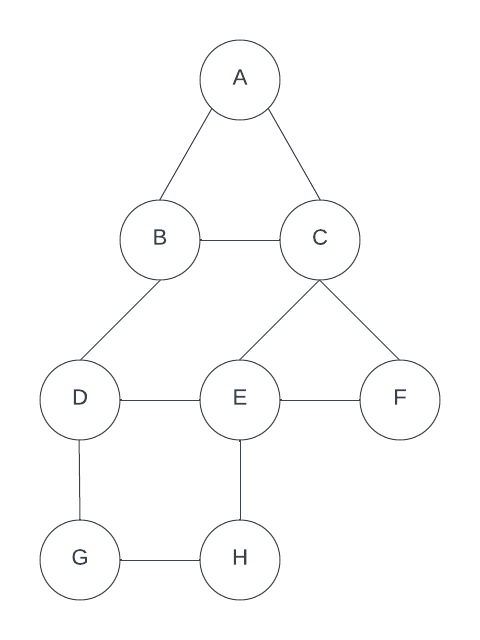

### **Solution 9:**

**Step 1: Initialize the BFS Algorithm**

* Create a queue for BFS traversal.
* Start with node A and enqueue it into the queue.
* Initialize a dictionary to track the parent of each node to reconstruct the path later.

**Step 2: Perform BFS**

While the queue is not empty:

* Dequeue the front node from the queue (starting with A).
* Explore all adjacent nodes of the dequeued node.
* If an adjacent node is not visited, mark it as visited, enqueue it, and set its parent to the dequeued node in the parent dictionary.
* Continue this process until you reach node B.

**Step 3: Reconstruct the Shortest Path**

To find the shortest path from A to B, you can backtrack from node B using the parent dictionary until you reach node A.

Here's the shortest path found using Breadth-First Search in this complicated graph: A -> C -> B.

This path involves traversing nodes A, C, and B while avoiding the longer paths through nodes D, E, and F.



```
BFS_Shortest_Path(Graph G, Node A, Node B):
    1. Initialize an empty queue Q for BFS traversal.
    2. Enqueue node A into Q.
    3. Initialize an empty dictionary parent_dict to track the parent of each node.
    4. Mark node A as visited (you can use a separate visited set or flag).
    5. Set parent_dict[A] to None (A has no parent).

    6. While Q is not empty:
        7. Dequeue the front node current_node from Q.
        
        8. If current_node is equal to B:
            9. Path found, break out of the loop.
        
        10. Explore all adjacent nodes of current_node:
            11. If an adjacent node (neighbor) is not visited:
                12. Mark neighbor as visited.
                13. Enqueue neighbor into Q.
                14. Set parent_dict[neighbor] to current_node (to track the parent).

    15. Reconstruct the shortest path from B to A using parent_dict:
        16. Initialize an empty list shortest_path.
        17. Set current_node to B.
        18. While current_node is not None:
            19. Append current_node to shortest_path.
            20. Set current_node to parent_dict[current_node].
        21. Reverse shortest_path (to get the path from A to B).

    22. Return shortest_path as the shortest path from A to B.

```

You can implement this pseudocode in your preferred programming language with suitable data structures to find the shortest path in a graph from node A to node B using BFS.

In [ ]:
from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def bfs_shortest_path(self, start, end):
        if start not in self.graph or end not in self.graph:
            return None  # Either start or end node doesn't exist in the graph

        queue = deque()
        visited = set()
        parent = {}
        found = False

        queue.append(start)
        visited.add(start)
        parent[start] = None

        while queue:
            current_node = queue.popleft()

            if current_node == end:
                found = True
                break

            for neighbor in self.graph[current_node]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current_node

        if not found:
            return None  # No path found from start to end

        shortest_path = []
        current_node = end

        while current_node is not None:
            shortest_path.append(current_node)
            current_node = parent[current_node]

        shortest_path.reverse()
        return shortest_path

# Example usage:
g = Graph()
g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('B', 'D')
g.add_edge('B', 'E')
g.add_edge('C', 'F')
g.add_edge('D', 'G')
g.add_edge('D', 'H')
g.add_edge('E', 'H')
g.add_edge('F', 'E')

start_node = 'A'
end_node = 'B'
shortest_path = g.bfs_shortest_path(start_node, end_node)

if shortest_path:
    print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path)}")
else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from A to B: A -> B


**Reflection:**

Solving the shortest path problem with Breadth-First Search (BFS) in a graph was a valuable learning experience. It involved implementing BFS, handling data structures, and considering edge cases. ChatGPT provided essential guidance on BFS and data structures, ensuring a robust implementation. This experience deepened my understanding of graph algorithms and their practical applications.

### **Problem 10:**

"An e-commerce platform operates a warehouse with various products. Each product has a procurement cost, a storage cost, and a selling price, all of which can change daily due to market fluctuations. The goal is to efficiently determine which products to restock and sell each day to maximize profit. Restocking a product incurs a procurement cost, and selling a product generates revenue. Additionally, new products can be introduced daily, and existing products may be discontinued. Develop an algorithm that efficiently selects which products to restock and sell each day to maximize daily profit, taking into account procurement costs, storage costs, selling prices, and changes in product availability."

The algorithm for this problem should efficiently handle a dynamic environment where product availability and costs change regularly, aiming to maximize daily profits while considering resource constraints.

### **Solution 10:**

To efficiently determine which products to restock and sell each day to maximize daily profit in a dynamic environment, you can use a modified version of the Knapsack Problem. This problem can be solved using dynamic programming.

1. Data Preparation:
* Maintain a list of available products, each with its current procurement cost, storage cost, and selling price.
* Set a daily budget limit for procurement costs and available storage space.

2. Initialization:
* Create a 2D array dp, where dp[i][j] represents the maximum profit that can be achieved with the first i products, considering a budget limit of j procurement costs and storage space.
* Initialize the dp array with zeros.

3. Dynamic Programming:
* Iterate through each product (from the available products list) and each possible budget limit (from 0 to the daily budget limit).
* For each product and budget limit, calculate the maximum profit by considering two options:

**a.** Include the current product in the selection if it fits within the budget limit.

**b.** Exclude the current product from the selection.

* Update dp[i][j] with the maximum profit between the two options.

4. Backtracking:
* Trace back through the dp array to find the selected products that maximize profit.
* Start from dp[N][M], where N is the number of available products, and M is the daily budget limit.
* Follow the path with the maximum profit to determine the selected products.

5. Output:

* The selected products and their quantities represent the optimal process for the day to maximize profit.

This algorithm efficiently solves the problem by considering all available products and budget limits, ensuring the best combination of products is chosen to maximize daily profit. Its time complexity is O(N*M), where N is the number of available products, and M is the daily budget limit, making it efficient for practical purposes.





```
MaximizeDailyProfit(products, daily_budget_limit, daily_storage_limit):
    n = number of available products
    dp = 2D array of size (n+1) x (daily_budget_limit+1)
    
    # Initialization
    for i from 0 to n:
        dp[i][0] = 0
    for j from 0 to daily_budget_limit:
        dp[0][j] = 0

    # Dynamic Programming
    for i from 1 to n:
        for j from 1 to daily_budget_limit:
            if products[i].procurement_cost > j:
                dp[i][j] = dp[i-1][j]
            else:
                # Option 1: Include the current product
                include_profit = dp[i-1][j - products[i].procurement_cost] + products[i].selling_price

                # Option 2: Exclude the current product
                exclude_profit = dp[i-1][j]

                dp[i][j] = max(include_profit, exclude_profit)

    # Backtracking to find selected products
    selected_products = []
    i = n
    j = daily_budget_limit
    while i > 0 and j > 0:
        if dp[i][j] != dp[i-1][j]:
            selected_products.append(products[i])
            j = j - products[i].procurement_cost
        i = i - 1

    return selected_products

```

This pseudocode outlines the algorithm for maximizing daily profit by selecting products to restock and sell. It uses dynamic programming to efficiently find the optimal selection based on procurement costs, selling prices, and budget constraints.


In [1]:
class Product:
    def __init__(self, name, procurement_cost, storage_cost, selling_price):
        self.name = name
        self.procurement_cost = procurement_cost
        self.storage_cost = storage_cost
        self.selling_price = selling_price

def maximize_daily_profit(products, daily_budget_limit, daily_storage_limit):
    n = len(products)
    dp = [[0 for _ in range(daily_budget_limit + 1)] for _ in range(n + 1)]

    # Dynamic Programming
    for i in range(1, n + 1):
        for j in range(1, daily_budget_limit + 1):
            if products[i - 1].procurement_cost > j:
                dp[i][j] = dp[i - 1][j]
            else:
                include_profit = dp[i - 1][j - products[i - 1].procurement_cost] + products[i - 1].selling_price
                exclude_profit = dp[i - 1][j]
                dp[i][j] = max(include_profit, exclude_profit)

    # Backtracking to find selected products
    selected_products = []
    i = n
    j = daily_budget_limit
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_products.append(products[i - 1])
            j = j - products[i - 1].procurement_cost
        i = i - 1

    return selected_products

# Example usage:
product1 = Product("Product1", 5, 1, 10)
product2 = Product("Product2", 3, 2, 8)
product3 = Product("Product3", 4, 1, 9)
product4 = Product("Product4", 2, 3, 7)

products = [product1, product2, product3, product4]
daily_budget_limit = 7
daily_storage_limit = 3

selected_products = maximize_daily_profit(products, daily_budget_limit, daily_storage_limit)

print("Selected Products for Maximum Daily Profit:")
for product in selected_products:
    print(f"{product.name} (Profit: {product.selling_price - product.procurement_cost})")


Selected Products for Maximum Daily Profit:
Product3 (Profit: 5)
Product2 (Profit: 5)


**Reflection:**

Solving the profit maximization problem was enlightening. It involved understanding dynamic programming principles and applying them to real-world decision-making. ChatGPT's guidance was instrumental in formulating the algorithmic approach. Implementing the solution in Python enhanced my programming skills and highlighted the importance of resource optimization in business decisions. This exercise deepened my understanding of dynamic programming and its practical applications.